In [1]:
import os
os.chdir('..\\sparklyRGT_tutorial')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


In [2]:
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']
df_melt

,Id,time_points,leaves
0,P1,W1,4
1,P2,W1,3
2,P3,W1,6
3,P4,W1,5
4,P5,W1,5
5,P1,W2,5
6,P2,W2,4
7,P3,W2,7
8,P4,W2,7
9,P5,W2,6


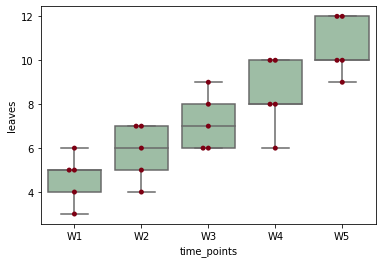

In [3]:
# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
ax = sns.boxplot(x='time_points', y='leaves', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="time_points", y="leaves", data=df_melt, color='#7d0013')
plt.show()

In [8]:
# install pingouin as !pip install pingouin
res = pg.rm_anova(dv='leaves', within='time_points', subject='Id', data=df_melt, detailed=True)
res['p-unc'][0] #selected out p-value! 
res

,Source,SS,DF,MS,F,p-unc,np2,eps
0,time_points,108.24,4,27.060,146.27027,2.214820e-12,0.973381,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


In [5]:
# make sure you have installed the pingouin package (pip install pingouin)
post_hocs = pg.pairwise_ttests(dv='leaves', within='time_points', subject='Id', padjust='fdr_bh', data=df_melt)
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,time_points,W1,W2,True,True,-6.000000,4.0,two-sided,0.003883,0.004853,fdr_bh,13.991,-0.884977
1,time_points,W1,W3,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.917450
2,time_points,W1,W4,True,True,-10.155927,4.0,two-sided,0.000529,0.000756,fdr_bh,60.047,-2.397193
3,time_points,W1,W5,True,True,-18.973666,4.0,two-sided,0.000045,0.000227,fdr_bh,369.333,-4.352931
4,time_points,W2,W3,True,True,-5.715476,4.0,two-sided,0.004636,0.005151,fdr_bh,12.3,-0.969840
5,time_points,W2,W4,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.565591
6,time_points,W2,W5,True,True,-24.000000,4.0,two-sided,0.000018,0.000179,fdr_bh,740.006,-3.277318
7,time_points,W3,W4,True,True,-3.207135,4.0,two-sided,0.032678,0.032678,fdr_bh,3.006,-0.722581
8,time_points,W3,W5,True,True,-13.880442,4.0,two-sided,0.000156,0.000521,fdr_bh,147.775,-2.321433
9,time_points,W4,W5,True,True,-11.000000,4.0,two-sided,0.000388,0.000743,fdr_bh,75.445,-1.310253
